In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import math
%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)

X=df.to_numpy()


C:\Users\praga\Downloads\PRML\Assign1


In [1]:
def kernelfunc(a,b,sigma=None):#func for K--- norm(x)
    norma=np.linalg.norm(a)
    normb=np.linalg.norm(b)
    return (norma*normb+1)**2

In [3]:
def Kmeans(Xa,K):#kmeans
    mus=np.random.choice(len(Xa),K,replace=False)
    means=Xa[mus]
    deg=len(means[0])
    clustinds=np.array([0 for i in range(len(Xa))])
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(Xa))])
    errorfunc=[]
    distmat=get_dist(means,Xa)
    clustinds=np.argmin(distmat,axis=1)
    loss=np.sum(np.min(distmat,axis=1))
    errorfunc.append(loss)
    noconv=1
    while noconv:
        loss=0
        means=get_means(K,clustinds,Xa,deg)#means step
        distmat=get_dist(means,Xa)
        clustinds=np.argmin(distmat,axis=1)
        loss=np.sum(np.min(distmat,axis=1))
        if loss==errorfunc[-1]:
            noconv=0
        errorfunc.append(loss)
    return means, clustinds, errorfunc

In [4]:
def get_means(K,clustind,Xa,d=6):#the mean substep
    means=np.zeros((K,d))
    meanscount=np.zeros(K)
    for i in range(len(Xa)):
        means[clustind[i]]+=Xa[i]
        meanscount[clustind[i]]+=1
    for r in range(K):
        if np.sum(means[r]):
            means[r]=means[r]/meanscount[r]
    return means
    

In [5]:
def get_dist(means,Xa):#distance calc
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(Xa))])
    for i in range(len(Xa)):
        dist[i]=np.sum((Xa[i]-means)**2,axis=1)
    return dist
        
    

In [6]:
def spectralize():
    import numpy as np#get h* normalized
    import math
    K=np.array([[0.0]*1000]*1000)#initialize K
    for i in range(1000):#computing Kernel
        for j in range(i,1000):
            K[i,j]=K[j,i]=kernelfunc(X[i],X[j])
    evals, evecs = np.linalg.eigh(K)#gives eigen in ascending and normalized vectors
    evecs = evecs[:,::-1]
    evals = evals[::-1]
    H=evecs[:,0:4]
    normalize=np.linalg.norm(H,axis=1)
    Hstar=H.copy()
    for i in range(1000):
        Hstar[i]=H[i]/normalize[i]
    Hstar[np.isnan(Hstar)]=0
    return Hstar

In [12]:
def Eigmax(verbose=False):
    
    Hstar=spectralize()
    clusts=np.argmax(Hstar,axis=1)
    plotter(clusts)
    if verbose:
        return clusts
    return

In [23]:
def plotter(Kres):
    K=4
    means=np.zeros((4,2))
    count=np.asarray([0,0,0,0])
    clusters=[[] for i in range(K)]
    for t in range(len(X)):
        clusters[Kres[t]].append(X[t])
        means[Kres[t]]+=X[t]
        count[Kres[t]]+=1
    for k in range(K):
        if np.sum(means[k]):
            means[k]=means[k]/count[k]
        
    if len(clusters[0]):
        plt.scatter(np.array(clusters[0])[:,0],np.array(clusters[0])[:,1],marker='*',color='r')
    if len(clusters[1]):
        plt.scatter(np.array(clusters[1])[:,0],np.array(clusters[1])[:,1],marker='*',color='g')
    if len(clusters[2]):
        plt.scatter(np.array(clusters[2])[:,0],np.array(clusters[2])[:,1],marker='*',color='b')
    if len(clusters[3]):
        plt.scatter(np.array(clusters[3])[:,0],np.array(clusters[3])[:,1],marker='*',color='y')
    plt.scatter(means[:,0],means[:,1],marker='D',color='black')
    plt.title('Spectral Eigmax')
    plt.xlabel('X: 1st component ->')
    plt.ylabel('X: 2nd component ->')
    plt.legend(['Cluster1','Cluster2','Cluster3','Cluster4',"means"])
    
        
        

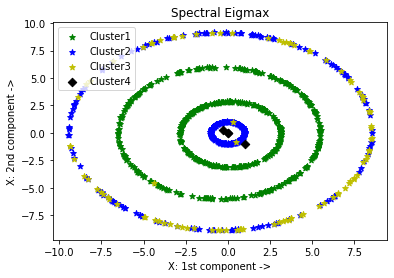

In [24]:
a=Eigmax(verbose=True)

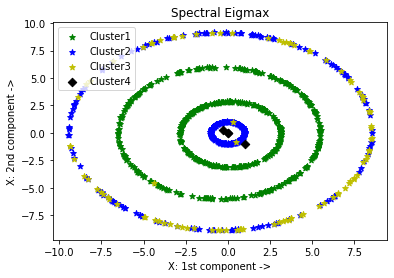

In [25]:
b=Eigmax(verbose=True)

In [ ]:
means=np.zeros((4,2))
count=np.asarray([0,0,0,0])
clusters=[[] for i in range(K)]
for t in range(len(X)):
    clusters[b[t]].append(X[t])
    means[b[t]]+=X[t]
    count[b[t]]+=1
for k in range(K):
    if np.sum(means[k]):
        means[k]=means[k]/count[k]
np.sum(get_dist(means,X))